# Scala's real-world project repository data

In [10]:
# Importing pandas
import pandas as pd

# Loading in the data
pulls_one = pd.read_csv('datasets/pulls_2011-2013.csv')
pulls_two = pd.read_csv('datasets/pulls_2014-2018.csv')
pull_files = pd.read_csv('datasets/pull_files.csv')

# Preparing and cleaning the data

In [11]:
# Append pulls_one to pulls_two
pulls = pulls_one.append(pulls_two)

# Convert the date for the pulls object
pulls['date'] = pd.to_datetime(pulls['date'],utc = True)

# Merging the DataFrames

In [12]:
# Merge the two DataFrames
data = pd.merge(pulls, pull_files, on = 'pid')

# Is the project still actively maintained?

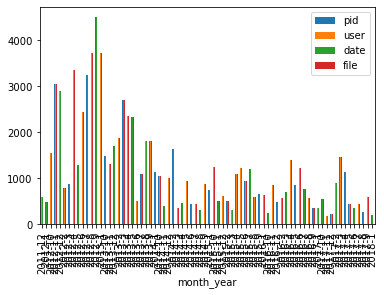

In [13]:
%matplotlib inline

# Create a column that will store the month and the year, as a string
data['month_year'] =  data.apply(lambda x: str(x['date'].year) + '-' + str(x['date'].month), axis = 1)

# Group by month_year and count the pull requests
counts = data.groupby('month_year').agg('count')

# Plot the results
counts.plot(kind = 'bar')

# Is there camaraderie in the project?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002270762ED30>,
      dtype=object)

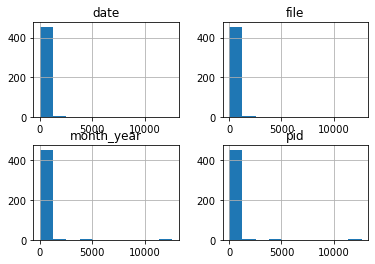

In [14]:
# Required for matplotlib
%matplotlib inline

# Group by the submitter
by_user = data.groupby('user').agg('count')

# Plot the histogram
by_user.hist()

# What files were changed in the last ten pull requests?

In [15]:
# Identify the last 10 pull requests
last_10 = pulls.nlargest(10,'date')

# Join the two data sets
joined_pr = pd.merge(last_10, pull_files)

# Identify the unique files
files = set(joined_pr['file'])

# Print the results
files # len: 34

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

# Who made the most pull requests to a given file?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002270AC64748>,
      dtype=object)

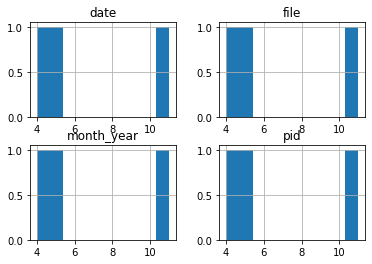

In [16]:
# This is the file we are interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the commits that changed the file
file_pr = data[data['file'] == file]

# Count the number of changes made by each developer
author_counts = file_pr.groupby('user').count()

# Print the top 3 developers
author_counts.nlargest(3,'file').hist()

# Who made the last ten pull requests on a given file?

In [17]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = data[data['file'] == file]

# Merge the obtained results with the pulls DataFrame
joined_pr = pd.merge(file_pr, pulls, on='pid')

# Find the users of the last 10 most recent pull requests
users_last_10 = set(file_pr.nlargest(10,'date')['user'])

# Printing the results
users_last_10
## {'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

# The pull requests of two special developers

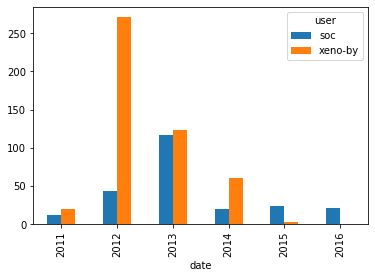

In [18]:
%matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls['user'].isin(authors)]

# Count the number of pull requests submitted each year
counts = by_author.groupby([by_author['date'].dt.year,'user']).agg({'pid': 'count'}).reset_index()

# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
counts_wide.plot( kind = 'bar')

# Visualizing the contributions of each developer

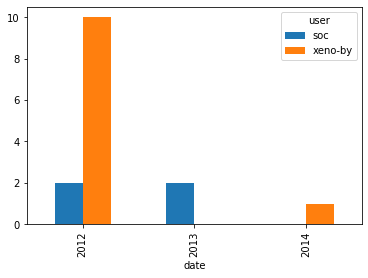

In [19]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data['user'].isin(authors)]

# Select the pull requests that affect the file
by_file = by_author[by_author['file'] == file]

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index = 'date', columns = 'user', values = 'pid', fill_value = 0)

# Plot the results
by_file_wide.plot(kind='bar')